## Import Libraries

In [61]:
import os
import pathlib
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### CONSTANTS 
change as per your requirements

In [78]:
NUMS=[str(i)for i in range(10)]
SMALL=[chr(ord('a')+i)for i in range(26)]
CAPS=[chr(ord('A')+i)for i in range(26)]
COMBINED=NUMS+SMALL+CAPS

IMAGE_SHAPE=(32,32)
FONT_SIZE=28

In [70]:
font_paths=list(map(str,list(pathlib.Path('fonts/').glob('*.ttf'))))
font_paths

['fonts/Roboto-ThinItalic.ttf',
 'fonts/OpenSans-SemiboldItalic.ttf',
 'fonts/FranklinGothic.ttf',
 'fonts/Roboto-LightItalic.ttf',
 'fonts/Roboto-Thin.ttf',
 'fonts/Roboto-Medium.ttf',
 'fonts/Roboto-Light.ttf',
 'fonts/FranklinGothicITALIC.ttf',
 'fonts/OpenSans-ExtraBold.ttf',
 'fonts/Roboto-BoldItalic.ttf',
 'fonts/Helvetica-Bold.ttf',
 'fonts/OpenSans-ExtraBoldItalic.ttf',
 'fonts/helvetica-light-587ebe5a59211.ttf',
 'fonts/Helvetica.ttf',
 'fonts/Roboto-Black.ttf',
 'fonts/Helvetica-BoldOblique.ttf',
 'fonts/times new roman bold.ttf',
 'fonts/OpenSans-Light.ttf',
 'fonts/times new roman.ttf',
 'fonts/times new roman bold italic.ttf',
 'fonts/Franklin Gothic Condensed.ttf',
 'fonts/OpenSans-Semibold.ttf',
 'fonts/Calibri.ttf',
 'fonts/times new roman italic.ttf',
 'fonts/OpenSans-LightItalic.ttf',
 'fonts/Roboto-Bold.ttf',
 'fonts/Roboto-MediumItalic.ttf',
 'fonts/calibrib.ttf',
 'fonts/OpenSans-Regular.ttf',
 'fonts/FRANKGO.ttf',
 'fonts/OpenSans-Italic.ttf',
 'fonts/Roboto-Black

## Base Image Creation

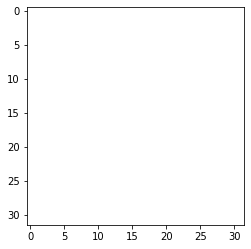

In [71]:
base_image=np.ones(IMAGE_SHAPE)*255
cv2.imwrite('base_image.png',base_image)
base_image=Image.open('base_image.png')
plt.imshow(base_image,cmap='binary')

## Fonts Dataset Creation

In [74]:
import shutil
try:
    shutil.rmtree('dataset')
except:
    pass
os.mkdir('dataset')


In [75]:
def center_text(img, font, text, color='black'):
    draw = ImageDraw.Draw(img)
    text_width, text_height = draw.textsize(text, font)
    position = ((IMAGE_SHAPE[1]-text_width)/2,(IMAGE_SHAPE[0]-text_height)/2)
    draw.text(position, text, color, font=font)
    return img

In [76]:
for char in COMBINED:
    count=0
    os.mkdir(f'dataset/{char}')
    for font_path in font_paths:
        base_image=Image.open('base_image.png')
        font_style = ImageFont.truetype(font_path, FONT_SIZE)
        base_image=center_text(base_image,font_style,char)
        base_image.save(f'dataset/{char}/{count}.png')
        count+=1
        

## Adding Augmented Images

In [77]:
image_paths=list(map(str,list(pathlib.Path('dataset').glob('*'))))
for image_path in image_paths:
    char=image_path.split('/')[-1]
    datagen=ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    )
    generator=datagen.flow_from_directory('dataset',
    classes=[char],
    save_format='png',
    save_to_dir=image_path,
    batch_size=64,
    target_size=IMAGE_SHAPE,)
    generator.next()
    generator.next()

    

Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 38 images belonging to 1 classes.


In [79]:
print("We are Done")

We are Done


## Thank You!